In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#code for read/load the following  audio dataset -/content/drive/MyDrive/Colab Notebooks/10_speacker_speech

from google.colab import drive
drive.mount('/content/drive')

import librosa
import os

def load_audio_dataset(dataset_path):
    audio_data = []
    labels = []

    for speaker_dir in os.listdir(dataset_path):
        speaker_path = os.path.join(dataset_path, speaker_dir)
        if os.path.isdir(speaker_path):
            for audio_file in os.listdir(speaker_path):
                if audio_file.endswith(('.wav', '.mp3')):  # Add more file extensions as needed
                    audio_path = os.path.join(speaker_path, audio_file)
                    try:
                        # Load audio file using librosa
                        y, sr = librosa.load(audio_path, sr=None)  # sr=None preserves original sample rate

                        audio_data.append(y)
                        labels.append(speaker_dir) # Use speaker directory as label

                    except Exception as e:
                        print(f"Error loading audio file {audio_path}: {e}")

    return audio_data, labels


# Example usage
dataset_path = '/content/drive/MyDrive/Colab Notebooks/10_speacker_speech'
audio_data, labels = load_audio_dataset(dataset_path)

# Now you can work with audio_data and labels
print(f"Loaded {len(audio_data)} audio files")
print(f"First 5 labels: {labels[:5]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-94c503a568f3>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)  # sr=None preserves original sample rate
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading audio file /content/drive/MyDrive/Colab Notebooks/10_speacker_speech/m00/m33w00r2.wav: 
Loaded 1798 audio files
First 5 labels: ['m60', 'm60', 'm60', 'm60', 'm60']


In [3]:
# code for explain dataset details.find each folder and it's number of audio.

from google.colab import drive
import librosa
import os
import pandas as pd

drive.mount('/content/drive')

def analyze_audio_dataset(dataset_path):
    data = []
    for speaker_dir in os.listdir(dataset_path):
        speaker_path = os.path.join(dataset_path, speaker_dir)
        if os.path.isdir(speaker_path):
            audio_files = [f for f in os.listdir(speaker_path) if f.endswith(('.wav', '.mp3'))]
            num_audio = len(audio_files)
            durations = []
            for audio_file in audio_files:
                audio_path = os.path.join(speaker_path, audio_file)
                try:
                    y, sr = librosa.load(audio_path, sr=None)
                    durations.append(librosa.get_duration(y=y, sr=sr))
                except Exception as e:
                    print(f"Error loading audio file {audio_path}: {e}")
                    # Handle the error appropriately, e.g., skip the file or set a default duration
                    durations.append(0) # Or another default value like -1
            if durations:
                min_duration = min(durations)
                max_duration = max(durations)
                avg_duration = sum(durations) / len(durations)
                data.append([speaker_dir, num_audio, min_duration, max_duration, avg_duration])
            else:
                # Handle the case where no valid audio files were found in the directory
                data.append([speaker_dir, 0, 0, 0, 0])
    df = pd.DataFrame(data, columns=['Folder', 'Num_Audio', 'Min_Duration', 'Max_Duration', 'Avg_Duration'])
    return df


# Example usage
dataset_path = '/content/drive/MyDrive/Colab Notebooks/10_speacker_speech'
df = analyze_audio_dataset(dataset_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-42fb0a12a5f7>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading audio file /content/drive/MyDrive/Colab Notebooks/10_speacker_speech/m00/m33w00r2.wav: 


,Folder,Num_Audio,Min_Duration,Max_Duration,Avg_Duration
0,m60,193,7.573750,19.753125,11.057547
1,m20,152,8.253875,20.852250,11.322694
2,m70,198,7.635375,19.688875,11.083129
3,m30,166,7.957250,18.102625,10.697530
4,m50,183,7.007250,18.031750,10.545557
5,m10,142,8.680750,20.771125,11.813879
6,m40,174,6.589750,19.960625,10.637530
7,m00,119,0.000000,15.642625,10.624645
8,me0 100,47,7.949875,13.839875,10.417436
9,m90,214,9.046625,21.661000,11.393358


In [4]:
#Write code for convert all these audio file into mfcc file and save them as same pattern. NB not generate numpy file.

import librosa
import os
import numpy as np

def convert_to_mfcc(audio_path, output_path):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        # You can save mfccs to a text file or other formats as needed.
        np.savetxt(output_path, mfccs)  # Save MFCCs as a text file
        #print(f"MFCCs saved to: {output_path}")
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")


def process_audio_dataset(dataset_path, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for speaker_dir in os.listdir(dataset_path):
        speaker_path = os.path.join(dataset_path, speaker_dir)
        output_speaker_dir = os.path.join(output_dir, speaker_dir)

        if os.path.isdir(speaker_path):
            if not os.path.exists(output_speaker_dir):
                os.makedirs(output_speaker_dir)
            for audio_file in os.listdir(speaker_path):
                if audio_file.endswith(('.wav', '.mp3')):
                    audio_path = os.path.join(speaker_path, audio_file)
                    output_file_path = os.path.join(output_speaker_dir, audio_file[:-4] + '.mfcc') # Change extension to .mfcc
                    convert_to_mfcc(audio_path, output_file_path)


# Example Usage
dataset_path = '/content/drive/MyDrive/Colab Notebooks/10_speacker_speech'
output_mfcc_dir = '/content/drive/MyDrive/Colab Notebooks/mfcc_output' # Specify output directory

process_audio_dataset(dataset_path, output_mfcc_dir)


<ipython-input-4-0fe75d95fcbf>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/drive/MyDrive/Colab Notebooks/10_speacker_speech/m00/m33w00r2.wav: 


In [5]:
# Normalize or scale the MFCC values to ensure uniformity.

import numpy as np
from sklearn.preprocessing import MinMaxScaler

def normalize_mfccs(mfcc_directory):
  for speaker_dir in os.listdir(mfcc_directory):
    speaker_path = os.path.join(mfcc_directory, speaker_dir)
    if os.path.isdir(speaker_path):
      for mfcc_file in os.listdir(speaker_path):
        if mfcc_file.endswith(".mfcc"):
          mfcc_file_path = os.path.join(speaker_path, mfcc_file)
          try:
            # Load MFCCs from the file
            mfccs = np.loadtxt(mfcc_file_path)

            # Normalize using MinMaxScaler
            scaler = MinMaxScaler()
            normalized_mfccs = scaler.fit_transform(mfccs.T).T  # Transpose for scaling, then transpose back

            # Save normalized MFCCs (replace the original file or save to a new one)
            np.savetxt(mfcc_file_path, normalized_mfccs) # Overwrites the original .mfcc file
            print(f"Normalized MFCCs saved to: {mfcc_file_path}")

          except Exception as e:
            print(f"Error processing {mfcc_file_path}: {e}")


# Example usage
mfcc_directory = '/content/drive/MyDrive/Colab Notebooks/mfcc_output'
normalize_mfccs(mfcc_directory)


Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m20w60r1.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m16w60r1.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m08w60r1.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m03w60r3.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m16w60r2.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m03w60r4.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m16w60r3.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m08w60r4.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m20w60r2.mfcc
Normalized MFCCs saved to: /content/drive/MyDrive/Colab Notebooks/mfcc_output/m60/m03w60r1.mfcc
Normalized MFCCs saved to: /content/driv

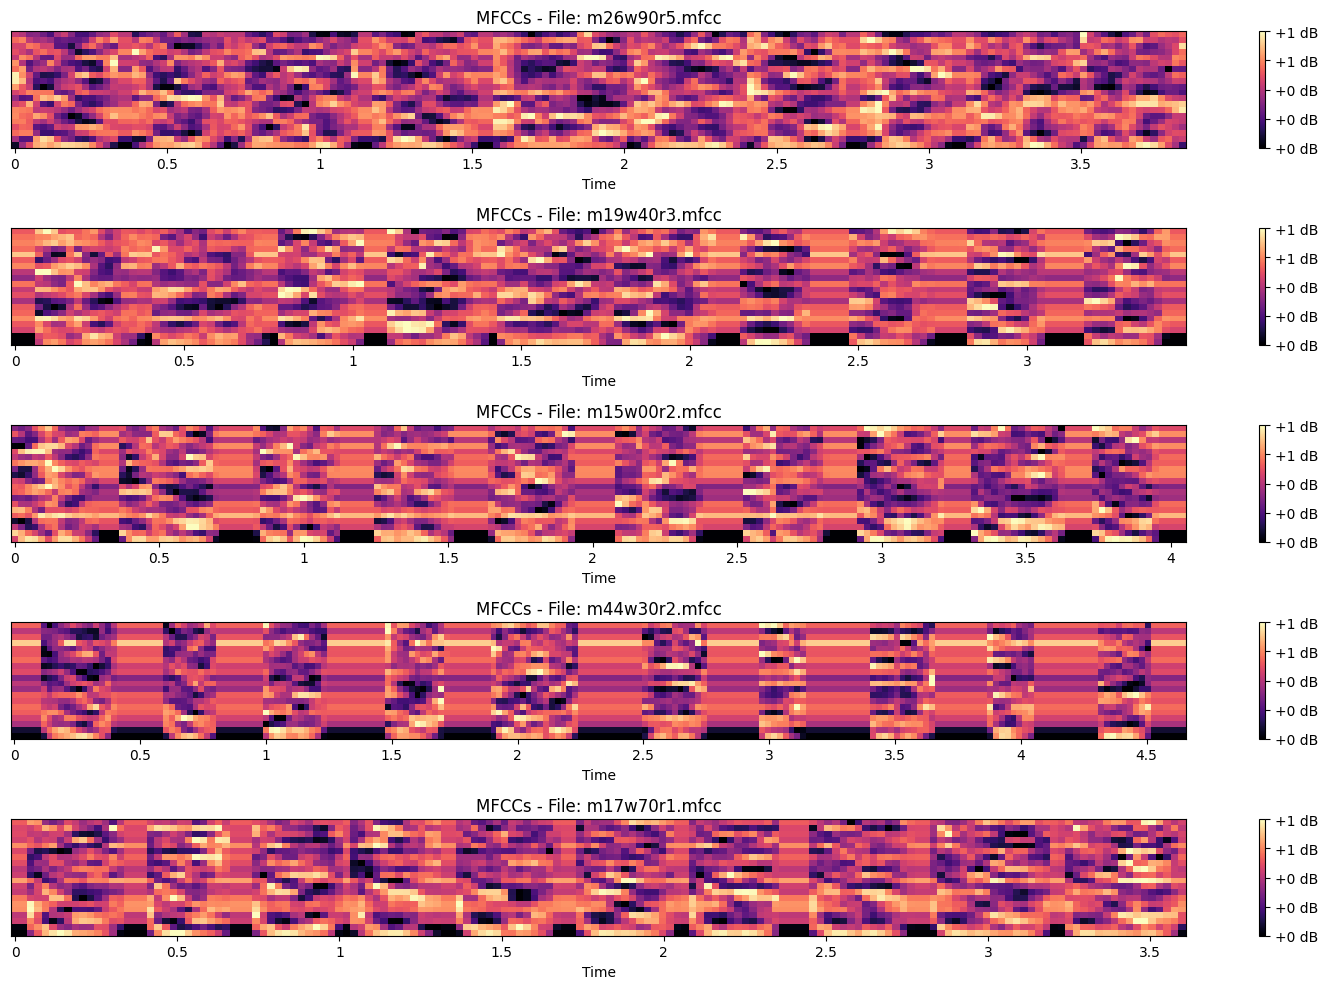

In [ ]:
#plot randomly 5 converted MFCCs to understand the patterns and characteristics of the audio signal.

import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming 'mfcc_directory' is defined from the previous code
mfcc_directory = '/content/drive/MyDrive/Colab Notebooks/mfcc_output'

# Select 5 random MFCC files
random_mfcc_files = []
for speaker_dir in os.listdir(mfcc_directory):
    speaker_path = os.path.join(mfcc_directory, speaker_dir)
    if os.path.isdir(speaker_path):
      mfcc_files = [f for f in os.listdir(speaker_path) if f.endswith(".mfcc")]
      for file in mfcc_files:
        random_mfcc_files.append(os.path.join(speaker_path,file))
random_mfcc_files = random.sample(random_mfcc_files, 5)

# Plot each selected MFCC
plt.figure(figsize=(15, 10))
for i, file_path in enumerate(random_mfcc_files):
    try:
      mfccs = np.loadtxt(file_path)
      plt.subplot(5, 1, i + 1)
      librosa.display.specshow(mfccs, sr=22050, x_axis='time') # Assuming a sample rate of 22050 Hz; adjust if different.
      plt.colorbar(format='%+2.0f dB')
      plt.title(f"MFCCs - File: {os.path.basename(file_path)}")
    except Exception as e:
      print(f"Error loading/plotting {file_path}: {e}")
plt.tight_layout()
plt.show()


In [6]:
#  Perform dimensionality reduction (e.g., PCA) to simplify features while retaining essential information.

import numpy as np
from sklearn.decomposition import PCA

def reduce_dimensionality(mfcc_data, n_components=10):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(mfcc_data)
    return reduced_data
# Example usage (assuming you have loaded your MFCC data into a variable called 'all_mfccs')
# Replace this with your actual MFCC data loading
all_mfccs = []
for speaker_dir in os.listdir(mfcc_directory):
  speaker_path = os.path.join(mfcc_directory, speaker_dir)
  if os.path.isdir(speaker_path):
    for mfcc_file in os.listdir(speaker_path):
      if mfcc_file.endswith(".mfcc"):
          mfcc_file_path = os.path.join(speaker_path, mfcc_file)
          mfccs = np.loadtxt(mfcc_file_path)

          # Pad or truncate MFCCs to a fixed length
          max_len = 150 # Adjust this value based on your data
          if mfccs.shape[1] < max_len:
              pad_width = max_len - mfccs.shape[1]
              mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
          else:
              mfccs = mfccs[:, :max_len]

          all_mfccs.append(mfccs.flatten()) # Flatten each MFCC matrix into a vector

all_mfccs = np.array(all_mfccs)


# Reduce dimensionality to 10 components
reduced_mfccs = reduce_dimensionality(all_mfccs, n_components=10)
print(reduced_mfccs.shape) # Verify the shape of the reduced data

(1798, 10)


In [7]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

def load_mfcc_data(data_dir):
    mfcc_data = []
    labels = []
    for speaker_dir in os.listdir(data_dir):
        speaker_path = os.path.join(data_dir, speaker_dir)
        if os.path.isdir(speaker_path):
            for mfcc_file in os.listdir(speaker_path):
                # Change .npy to .mfcc to match the file extension
                if mfcc_file.endswith(".mfcc"):
                    mfcc_path = os.path.join(speaker_path, mfcc_file)
                    mfccs = np.loadtxt(mfcc_path) # Load using np.loadtxt

                    # Pad or truncate MFCCs to a fixed length
                    max_len = 100 # Choose an appropriate maximum length
                    if mfccs.shape[1] < max_len:
                        pad_width = max_len - mfccs.shape[1]
                        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
                    else:
                        mfccs = mfccs[:, :max_len]

                    mfcc_data.append(mfccs)
                    labels.append(speaker_dir)
    return mfcc_data, labels


# Load MFCC data
mfcc_data_dir = "/content/drive/MyDrive/Colab Notebooks/mfcc_output"
mfcc_data, labels = load_mfcc_data(mfcc_data_dir)

# Convert to numpy arrays for easier handling
mfcc_data = np.array(mfcc_data)
labels = np.array(labels)

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    mfcc_data, labels, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [8]:
y_test


array(['m50', 'm70', 'm20', 'm00', 'm10', 'm20', 'm00', 'm90', 'm80',
       'm70', 'm30', 'm40', 'm90', 'm80', 'm90', 'm70', 'm80', 'm40',
       'm90', 'm20', 'm60', 'm50', 'm70', 'm10', 'm20', 'm90', 'm90',
       'm40', 'm50', 'm40', 'm80', 'm30', 'm70', 'm60', 'm30', 'm60',
       'm30', 'me0 100', 'me0 100', 'm20', 'm80', 'm30', 'm60', 'm30',
       'm20', 'm90', 'm80', 'm10', 'm00', 'm10', 'm70', 'm90', 'm40',
       'm80', 'm90', 'm00', 'm20', 'm50', 'm50', 'm50', 'm90', 'm70',
       'm80', 'm30', 'm20', 'm70', 'm60', 'm50', 'm90', 'm40', 'm30',
       'm80', 'm40', 'm90', 'm00', 'm00', 'm70', 'm10', 'm60', 'm90',
       'm60', 'm70', 'm20', 'm50', 'm00', 'm30', 'm50', 'm20', 'm80',
       'm40', 'm80', 'm60', 'me0 100', 'm60', 'm10', 'm80', 'm40', 'm80',
       'm50', 'm30', 'm80', 'm40', 'm60', 'm10', 'm70', 'm50', 'm20',
       'm70', 'm30', 'm50', 'm70', 'm30', 'm60', 'm80', 'm10', 'm50',
       'm10', 'm70', 'm40', 'm90', 'm60', 'm00', 'm20', 'm80', 'm50',
       'm20', '

X_train shape: (1258, 20, 100)
X_val shape: (270, 20, 100)
X_test shape: (270, 20, 100)
Expected input shape: (None, 20, 100)
Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.1409 - loss: 2.3503 - val_accuracy: 0.1481 - val_loss: 2.2770
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.3701 - loss: 2.1257 - val_accuracy: 0.7667 - val_loss: 1.3391
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8195 - loss: 0.9479 - val_accuracy: 0.8222 - val_loss: 0.6484
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.9091 - loss: 0.3278 - val_accuracy: 0.9333 - val_loss: 0.2647
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9757 - loss: 0.1070 - val_accuracy: 0.9444 - val_loss: 0.2178
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9949 - loss: 0.0594 - val_accuracy: 0.9444 - val_loss: 0.2079
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9963 - loss: 0.0415 - val_accuracy: 0.9481 - 

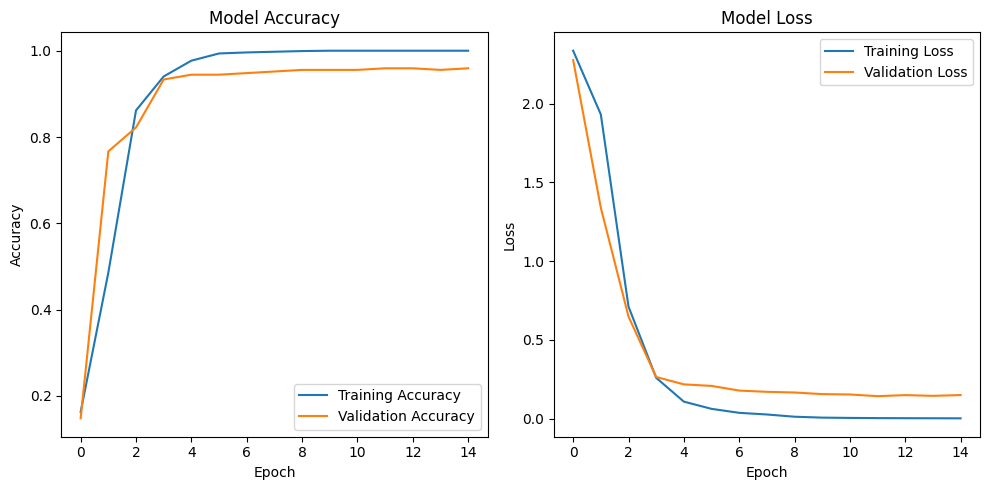

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
# Updated input shape to match X_train shape
model = keras.Sequential(
    [
        keras.Input(shape=(20, 100)),  # Input shape: (n_mfcc, max_length)
        layers.Reshape((20, 100, 1)),  # Reshape for Conv2D - Updated shape
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(len(np.unique(labels)), activation="softmax"),  # Output layer
    ]
)

# ... (Rest of the code remains the same) ...
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# Convert labels to numerical indices
label_to_index = {label: index for index, label in enumerate(np.unique(labels))}
y_train_indexed = np.array([label_to_index[label] for label in y_train])
y_val_indexed = np.array([label_to_index[label] for label in y_val])
y_test_indexed = np.array([label_to_index[label] for label in y_test])


# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("Expected input shape:", model.input_shape)

# Train the model
# Train the model and store the training history
history = model.fit(X_train, y_train_indexed, epochs=15, batch_size=32, validation_data=(X_val, y_val_indexed))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_indexed)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Access the training history correctly
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
# Access the training history correctly
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


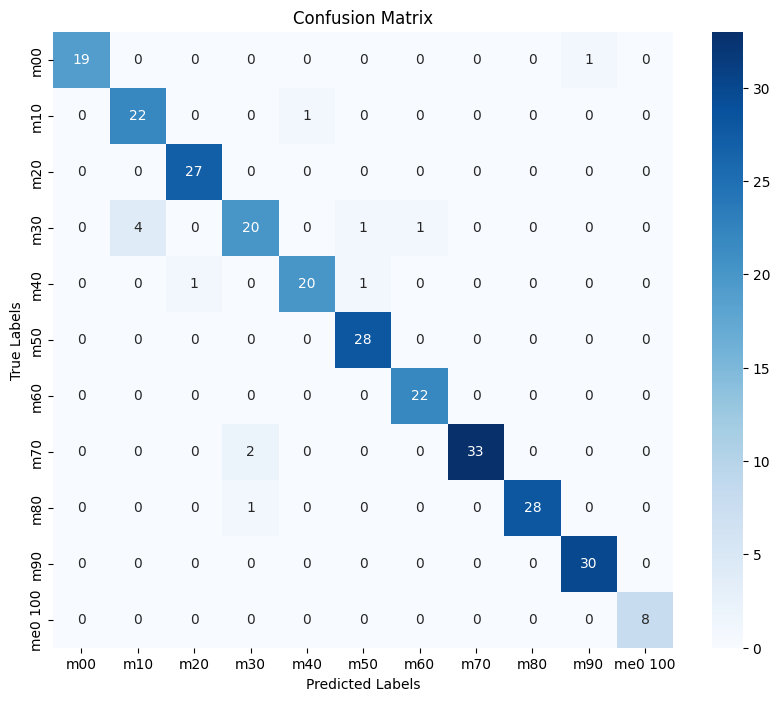

In [ ]:
# Code for confussion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_indexed, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Write code for performance matrix like precesion recall f1 score. make table

import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# ... (Your existing code) ...

# Get predictions for the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_indexed, y_pred, average='weighted')
recall = recall_score(y_test_indexed, y_pred, average='weighted')
f1 = f1_score(y_test_indexed, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate a classification report
report = classification_report(y_test_indexed, y_pred, target_names=np.unique(labels))
print(report)

# Create a DataFrame for better visualization
performance_metrics = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score': [precision, recall, f1]
}
df_metrics = pd.DataFrame(performance_metrics)
print(df_metrics)

# Display the DataFrame as a table
from IPython.display import display, HTML
display(HTML(df_metrics.to_html(index=False)))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Precision: 0.9528422185575062
Recall: 0.9518518518518518
F1-score: 0.9513131281194858
              precision    recall  f1-score   support

         m00       1.00      0.95      0.97        20
         m10       0.85      0.96      0.90        23
         m20       0.96      1.00      0.98        27
         m30       0.87      0.77      0.82        26
         m40       0.95      0.91      0.93        22
         m50       0.93      1.00      0.97        28
         m60       0.96      1.00      0.98        22
         m70       1.00      0.94      0.97        35
         m80       1.00      0.97      0.98        29
         m90       0.97      1.00      0.98        30
     me0 100       1.00      1.00      1.00         8

    accuracy                           0.95       270
   macro avg       0.95      0.95      0.95       270
weighted avg       0.95      0.95      0.95       270

      Metric     Score
0  Precision  0.952842
1     Recall  0.9

Metric,Score
Precision,0.952842
Recall,0.951852
F1-Score,0.951313


In [ ]:
#  Audio Clustering
# Use clustering algorithms like k-means to group similar audio signals based on their MFCC features. and evaluation code

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming mfcc_data and labels are loaded as in the previous code

# Reshape the MFCC data for KMeans (flatten each MFCC sequence)
X_kmeans = mfcc_data.reshape(mfcc_data.shape[0], -1)

# Determine the optimal number of clusters using the silhouette score
best_score = -1
best_k = 2  # Start with 2 clusters
for k in range(2, 11):  # Test k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_kmeans)
    score = silhouette_score(X_kmeans, cluster_labels)
    print(f"Silhouette score for k={k}: {score}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nBest k: {best_k} with silhouette score: {best_score}")

# Perform k-means clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_kmeans)

# Evaluate the clustering (example using silhouette score)
silhouette_avg = silhouette_score(X_kmeans, cluster_labels)
print(f"Average silhouette score: {silhouette_avg}")

# Analyze cluster characteristics
# Example: Count the number of data points in each cluster
from collections import Counter
cluster_counts = Counter(cluster_labels)
print(f"Cluster counts:\n{cluster_counts}")

#Further analysis using other metrics like Calinski-Harabasz index, Davies-Bouldin index
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_kmeans, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score}")

from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X_kmeans, cluster_labels)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette score for k=2: 0.038485379325171994
Silhouette score for k=3: 0.03761359543953623
Silhouette score for k=4: 0.04045652175063283
Silhouette score for k=5: 0.04440250015151184
Silhouette score for k=6: 0.04495027953738099
Silhouette score for k=7: 0.04375569060835987
Silhouette score for k=8: 0.048069807479116
Silhouette score for k=9: 0.04393083114778077
Silhouette score for k=10: 0.04264249845850831

Best k: 8 with silhouette score: 0.048069807479116
Average silhouette score: 0.048069807479116
Cluster counts:
Counter({6: 312, 2: 289, 7: 283, 5: 253, 0: 198, 4: 170, 1: 165, 3: 128})
Calinski-Harabasz Index: 40.337957821012516
Davies-Bouldin Index: 3.9308559409019583


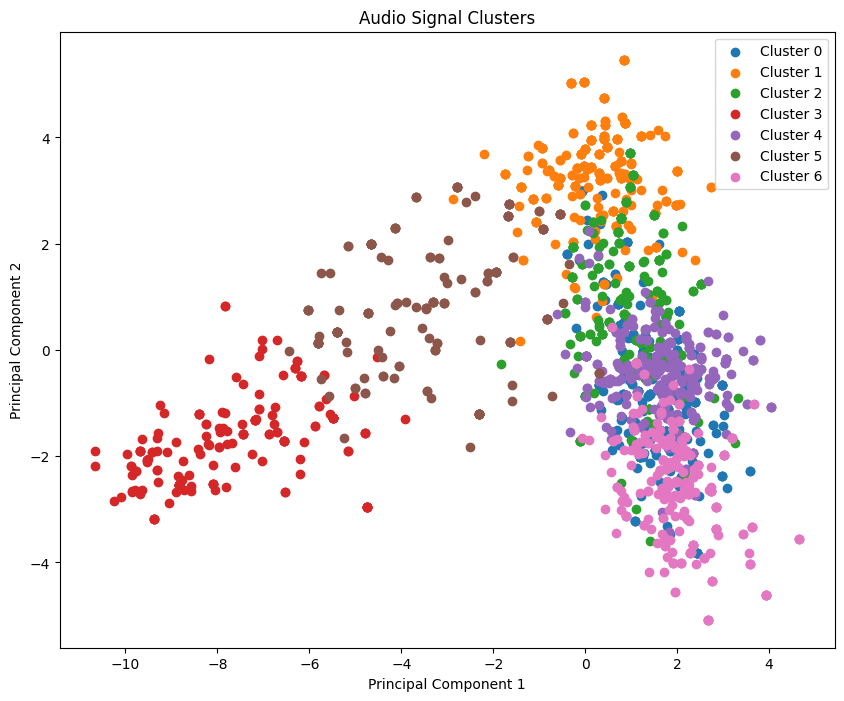

Cluster 0:
  Speaker m60: 18 audio files
  Speaker m20: 25 audio files
  Speaker m70: 28 audio files
  Speaker m30: 33 audio files
  Speaker m50: 23 audio files
  Speaker m10: 25 audio files
  Speaker m40: 24 audio files
  Speaker m00: 17 audio files
  Speaker me0 100: 6 audio files
  Speaker m90: 33 audio files
  Speaker m80: 36 audio files
Cluster 1:
  Speaker m60: 24 audio files
  Speaker m20: 16 audio files
  Speaker m70: 53 audio files
  Speaker m30: 47 audio files
  Speaker m50: 32 audio files
  Speaker m10: 16 audio files
  Speaker m40: 21 audio files
  Speaker m00: 22 audio files
  Speaker me0 100: 10 audio files
  Speaker m90: 31 audio files
  Speaker m80: 34 audio files
Cluster 2:
  Speaker m60: 39 audio files
  Speaker m20: 28 audio files
  Speaker m70: 37 audio files
  Speaker m30: 12 audio files
  Speaker m50: 17 audio files
  Speaker m10: 8 audio files
  Speaker m40: 31 audio files
  Speaker m00: 20 audio files
  Speaker me0 100: 4 audio files
  Speaker m90: 24 audio file

In [ ]:
#  You can now analyze the cluster_labels to understand how the audio signals are grouped.
# # # For example, you can plot the labels of the audio files in each cluster.

import matplotlib.pyplot as plt
# Assuming 'reduced_mfccs' and 'labels' are available from previous code
# and that you have performed clustering (e.g., using KMeans)

# Example using KMeans (replace with your actual clustering method)
kmeans = KMeans(n_clusters=7, random_state=0)  # Adjust n_clusters as needed
cluster_labels = kmeans.fit_predict(reduced_mfccs)

# Now you can analyze the cluster_labels to understand how the audio signals are grouped.
# For example, you can plot the labels of the audio files in each cluster.

# Create a scatter plot of the reduced MFCCs, colored by cluster label
plt.figure(figsize=(10, 8))
for i in range(kmeans.n_clusters):
    plt.scatter(reduced_mfccs[cluster_labels == i, 0], reduced_mfccs[cluster_labels == i, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')  # or another principal component
plt.title('Audio Signal Clusters')
plt.legend()
plt.show()

# Analyze the distribution of speakers in each cluster
cluster_speaker_counts = {}
for i in range(kmeans.n_clusters):
    cluster_speakers = [labels[j] for j in range(len(labels)) if cluster_labels[j] == i]
    cluster_speaker_counts[i] = {}
    for speaker in cluster_speakers:
        cluster_speaker_counts[i][speaker] = cluster_speakers.count(speaker)

# Print the speaker counts for each cluster
for cluster, speaker_counts in cluster_speaker_counts.items():
    print(f"Cluster {cluster}:")
    for speaker, count in speaker_counts.items():
        print(f"  Speaker {speaker}: {count} audio files")
